# Lab 2

In [33]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd

df = pd.read_csv('s3://ia340lab1-bucket-porter/Real_Estate_Sales_2001-2023_GL.csv') # load the data from s3
df.head() #show the top 5 rows


,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020177,2020,04/14/2021,Ansonia,323 BEAVER ST,133000.0,248400.0,0.5354,Residential,Single Family,NaN,NaN,NaN,POINT (-73.06822 41.35014)
1,2020225,2020,05/26/2021,Ansonia,152 JACKSON ST,110500.0,239900.0,0.4606,Residential,Three Family,NaN,NaN,NaN,NaN
2,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.463,Commercial,NaN,NaN,NaN,NaN,NaN
3,2020090,2020,12/14/2020,Ansonia,57 PLATT ST,127400.0,202500.0,0.6291,Residential,Two Family,NaN,NaN,NaN,NaN
4,210288,2021,06/20/2022,Avon,12 BYRON DRIVE,179990.0,362500.0,0.4965,Residential,Condo,NaN,NaN,NaN,POINT (-72.879115982 41.773452988)


In [34]:
df.shape #shows the number of rows and columns

(1141722, 14)

In [35]:
df.info() #shows basic info of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1141722 entries, 0 to 1141721
Data columns (total 14 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Serial Number     1141722 non-null  int64  
 1   List Year         1141722 non-null  int64  
 2   Date Recorded     1141720 non-null  object 
 3   Town              1141722 non-null  object 
 4   Address           1141671 non-null  object 
 5   Assessed Value    1141722 non-null  float64
 6   Sale Amount       1141722 non-null  float64
 7   Sales Ratio       1141722 non-null  object 
 8   Property Type     759276 non-null   object 
 9   Residential Type  738804 non-null   object 
 10  Non Use Code      324807 non-null   object 
 11  Assessor Remarks  181090 non-null   object 
 12  OPM remarks       14346 non-null    object 
 13  Location          341241 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 121.9+ MB


In [36]:
df.describe()

,Serial Number,List Year,Assessed Value,Sale Amount
count,1.141722e+06,1.141722e+06,1.141722e+06,1.141722e+06
mean,5.457366e+05,2.011673e+03,2.833275e+05,4.104510e+05
std,7.450110e+06,7.018679e+00,1.656128e+06,5.048996e+06
min,0.000000e+00,2.001000e+03,0.000000e+00,0.000000e+00
25%,3.090300e+04,2.005000e+03,8.991000e+04,1.461000e+05
50%,9.016000e+04,2.012000e+03,1.419800e+05,2.375000e+05
75%,1.801550e+05,2.018000e+03,2.300600e+05,3.837500e+05
max,2.000500e+09,2.023000e+03,8.815100e+08,5.000000e+09


There are 1141722 rows and 14 columns. 2 columns are floats, 2 integers and 10 objects.

In [37]:
df = df.rename(columns={'List Year': 'Year Listed'})

In [38]:
df.isnull().sum()

Serial Number             0
Year Listed               0
Date Recorded             2
Town                      0
Address                  51
Assessed Value            0
Sale Amount               0
Sales Ratio               0
Property Type        382446
Residential Type     402918
Non Use Code         816915
Assessor Remarks     960632
OPM remarks         1127376
Location             800481
dtype: int64

In [39]:
df = df.dropna()

 I changed List Year to Year Listed and using dropna and isnull I found and removed all but 720 rows due to missing values.

In [40]:
df['Town']

674             Berlin
715          Fairfield
1381           Danbury
1438           Danbury
2066       East Granby
              ...     
1140329        Shelton
1140805        Shelton
1140826       Portland
1141238        Redding
1141721        Shelton
Name: Town, Length: 720, dtype: object

In [41]:
df.sort_values(by='Sale Amount')

,Serial Number,Year Listed,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
1112366,230079,2023,11/21/2023,Groton,268 FLANDERS RD LOT 1,9450.0,2000.0,4.725,Residential,Single Family,25 - Other,MOBILE HOME - SENDING SALES QUESTIONNAIRE,RATIO - PURCHASE FROM OWNER OF MOBILE HOME PARK,POINT (-72.00773 41.35831)
1105173,230080,2023,11/21/2023,Groton,268 FLANDERS RD LOT 21,6230.0,2500.0,2.492,Residential,Single Family,25 - Other,SENDING SALES QUESTIONNAIRE,RATIO - PURCHASE FROM OWNER OF MOBILE HOME PARK,POINT (-72.00773 41.35831)
935781,180148,2018,04/29/2019,Clinton,133 WEST MAIN ST LOT C-4,33400.0,4500.0,7.422222,Single Family,Single Family,25 - Other,MOBILE HOME ONLY ON LEASED LOT,BELOW MARKET - RATIO,POINT (-72.54104 41.2775)
1087034,220809,2022,08/07/2023,Norwich,44 NORWICH AVE #44,10600.0,5000.0,2.12,Residential,Single Family,25 - Other,OTHER,MOBILE HOME - BELOW MARKET,POINT (-72.052608026 41.554656984)
1097268,220807,2022,08/07/2023,Norwich,44 NORWICH AVE #21,8700.0,5000.0,1.74,Residential,Single Family,25 - Other,OTHER,MOBILE HOME - BELOW MARKET,POINT (-72.052580031 41.553575006)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055467,220511,2022,04/26/2023,Branford,GREEN ISLAND,769900.0,3500000.0,0.22,Residential,Single Family,25 - Other,"PURCHASED GREEN ISLAND IN ONE DEED, OTHER PARC...",PER MLS SALE INCLUDES 78 ACRES OF OYSTER BEDS ...,POINT (-72.84316 41.25537)
1085483,220311,2022,12/20/2022,Norwalk,51 PINE POINT RD,1000520.0,3675000.0,0.2723,Residential,Single Family,07 - Change in Property,6-57A-1-0,"ADDITIONS AND ALTERATIONS, NEW ASSESSMENT = $1...",POINT (-73.438885963 41.057886016)
8940,200403,2020,07/02/2021,East Lyme,249 OLD BLACK PT RD,2083410.0,6568750.0,0.31717,Residential,Single Family,07 - Change in Property,WATERFRONT,PER MLS HOUSE COMPLETED JAN. 2020 - ASSESSMENT...,POINT (-72.21122 41.28831)
1090670,220371,2022,01/13/2023,Norwalk,11 HARBOR BLUFF LN,1711290.0,7000000.0,0.2445,Residential,Condo,07 - Change in Property,6-16C-2-11; CONDO PUD,"PER MLS HOME HAS 5 BEDROOMS, 5.5 BATHS AND 2,0...",POINT (-73.435443013 41.063864995)


In [42]:
df[0:5]

,Serial Number,Year Listed,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
674,210296,2021,07/06/2022,Berlin,355 RESERVOIR RD,172300.0,240000.0,0.717917,Residential,Single Family,25 - Other,OTHER,TWO SALES IN ONE DAY - SEE #210295,POINT (-72.804847962 41.612923994)
715,210197,2021,11/30/2021,Fairfield,125 VESPER STREET,264320.0,334000.0,0.791377,Residential,Single Family,25 - Other,POSSIBLE DURESS,PER MLS SLOPING ISSUES ON 2ND FLOOR. ENGINEERS...,POINT (-73.234403987 41.179839983)
1381,211177,2021,06/28/2022,Danbury,55 MILL PLAIN RD 13-1,146600.0,285000.0,0.514386,Residential,Condo,25 - Other,D15004-80,DUPLICATE ENTRY - ALSO SEE #211176,POINT (-73.502786995 41.391933021)
1438,210856,2021,04/13/2022,Danbury,60 NABBY RD 78,151600.0,350000.0,0.433143,Residential,Condo,25 - Other,L08054-78,DUPLICATE ENTRY - ALSO SEE #210855,POINT (-73.421529975 41.429339988)
2066,210140,2021,09/15/2022,East Granby,143-145 NORTH MAIN STREET,130600.0,75000.0,1.741333,Residential,Two Family,07 - Change in Property,"PP TOO LOW, RATIO TOO HIGH",POOR CONDITION PER MLS - ASSESSMENT REDUCED TO...,POINT (-72.720844025 41.963067982)


In [43]:
df[(df['Year Listed']>= 2020)]

,Serial Number,Year Listed,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
674,210296,2021,07/06/2022,Berlin,355 RESERVOIR RD,172300.0,240000.0,0.717917,Residential,Single Family,25 - Other,OTHER,TWO SALES IN ONE DAY - SEE #210295,POINT (-72.804847962 41.612923994)
715,210197,2021,11/30/2021,Fairfield,125 VESPER STREET,264320.0,334000.0,0.791377,Residential,Single Family,25 - Other,POSSIBLE DURESS,PER MLS SLOPING ISSUES ON 2ND FLOOR. ENGINEERS...,POINT (-73.234403987 41.179839983)
1381,211177,2021,06/28/2022,Danbury,55 MILL PLAIN RD 13-1,146600.0,285000.0,0.514386,Residential,Condo,25 - Other,D15004-80,DUPLICATE ENTRY - ALSO SEE #211176,POINT (-73.502786995 41.391933021)
1438,210856,2021,04/13/2022,Danbury,60 NABBY RD 78,151600.0,350000.0,0.433143,Residential,Condo,25 - Other,L08054-78,DUPLICATE ENTRY - ALSO SEE #210855,POINT (-73.421529975 41.429339988)
2066,210140,2021,09/15/2022,East Granby,143-145 NORTH MAIN STREET,130600.0,75000.0,1.741333,Residential,Two Family,07 - Change in Property,"PP TOO LOW, RATIO TOO HIGH",POOR CONDITION PER MLS - ASSESSMENT REDUCED TO...,POINT (-72.720844025 41.963067982)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1140329,230355,2023,05/28/2024,Shelton,208 SOUNDVIEW AVE,267750.0,275500.0,0.9719,Residential,Single Family,25 - Other,125 58,SHORT SALE PER MLS,POINT (-73.1359 41.31746)
1140805,230398,2023,06/21/2024,Shelton,36 SALLYS WAY,149310.0,529900.0,0.2818,Residential,Condo,07 - Change in Property,51 13 36,NEW CONSTRUCTION - CO 6/12/2024,POINT (-71.92826 41.33375)
1140826,230007,2023,10/16/2023,Portland,11 WILDWOOD RD,155400.0,225000.0,0.6907,Residential,Single Family,25 - Other,042-0027,"BELOW MARKET - RESOLD 12/19/2023 $300,500 WITH...",POINT (-72.58571 41.58278)
1141238,2300040,2023,01/17/2024,Redding,358 NEWTOWN TPKE,700000.0,1325000.0,0.5283,Residential,Single Family,25 - Other,RELOCATION,SEE #2300039,POINT (-73.35635 41.30567)


The Town variable was selected, the Sale Amount was sorted and the Year listed was filtered to show only data from 2020 or newer

In [44]:
sum_sale_amount_by_year = df.groupby('Year Listed')['Sale Amount'].sum()
sum_sale_amount_by_year.head()

Year Listed
2016      1684497.0
2017     17118300.0
2018      9985213.0
2019     11584185.0
2020    362613502.0
Name: Sale Amount, dtype: float64

# Line Chart Showing Sale Amount by the Year Listed

<Axes: xlabel='Year Listed'>

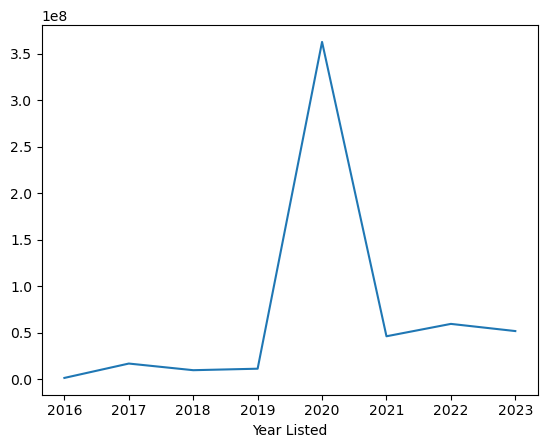

In [45]:
sum_sale_amount_by_year.plot()

This chart shows a more fluid version of the housing sales per year. This chart is good for showing the spike in the housing market in 2004 and 2020 and the dip during the 2008 housing crisis.

# Bar Chart Showing Sale Amount by Year Listed

<Axes: xlabel='Year Listed'>

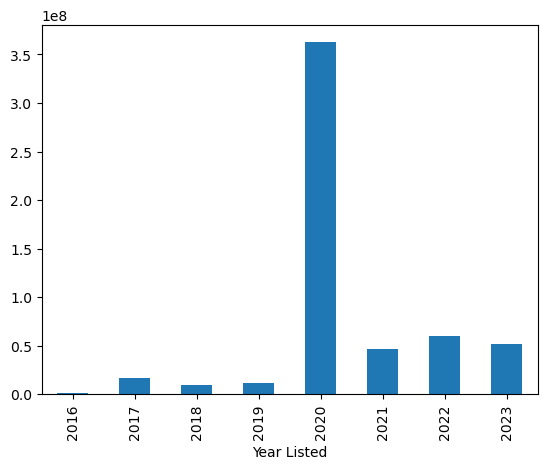

In [46]:
sum_sale_amount_by_year.plot.bar(x= 'Sum Sale', y= 'Year Listed')

In this data I can see that the sales in the housing market tends to stay fair steady besides a few dips line the 2008 housing crisis. There are also some high points such as when COVID hit in 2020 and in 2004.